In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
#or plt.style.use('seaborn-dark')

##### 과제 1번

    Titanic 데이터셋에 대한 탐색을 통하여 그룹 조합별 인사이트 5개 이상을 도출하여 기술하세요

In [2]:
#데이터셋 불러오기
titanic = sns.load_dataset('titanic')
#데이터 정보파악
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


    우선 성별 sex를 를 분석해봅시다

,survived
sex,
female,0.742038
male,0.188908


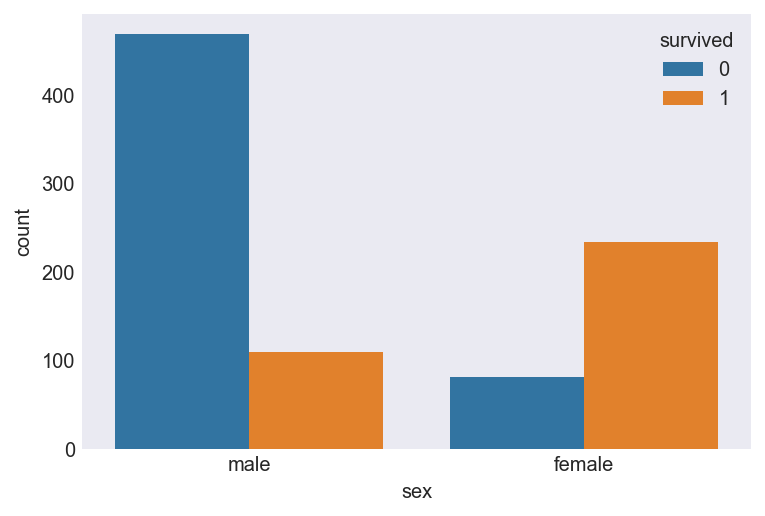

In [3]:
sns.countplot(data=titanic,x='sex',hue='survived')
#여성이 남자보다 생족 확률이 높음
pd.pivot_table(titanic, index='sex', values='survived')

In [4]:
#이상치 제외 891명!
titanic[['sex','survived']].groupby(['sex']).count() #남 577탑승 여 314탑승
titanic[['sex','survived']].groupby(['sex']).sum() #남 109 생존 여 233 생존

,survived
sex,
female,233
male,109


###### 인사이트 1
- 여성이 남성보다 압도적으로 생존확률이 높음! 
- 여성보다 남성이 더 많이 탑승했지만, 여성의 생존률이 높음
- 여성의 생존을 더욱 우선시 한걸로 볼 수 있음!

    나이와 요금은 어떨까 누가 돈을 냈을까

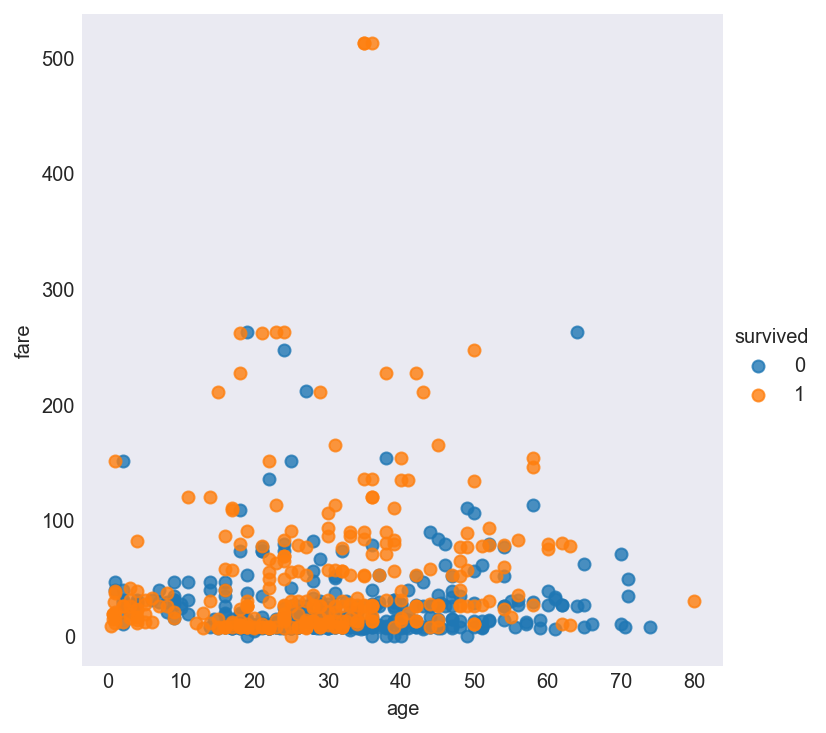

In [5]:
sns.lmplot(data=titanic, x ='age', y = 'fare', hue='survived',fit_reg=False)

- 생존(주황색)이 상대적으로 어린쪽으로 몰려있음.
- 그 중 운임요금이 500이상에 있는 것들은 = outlier! 제거해야됨.

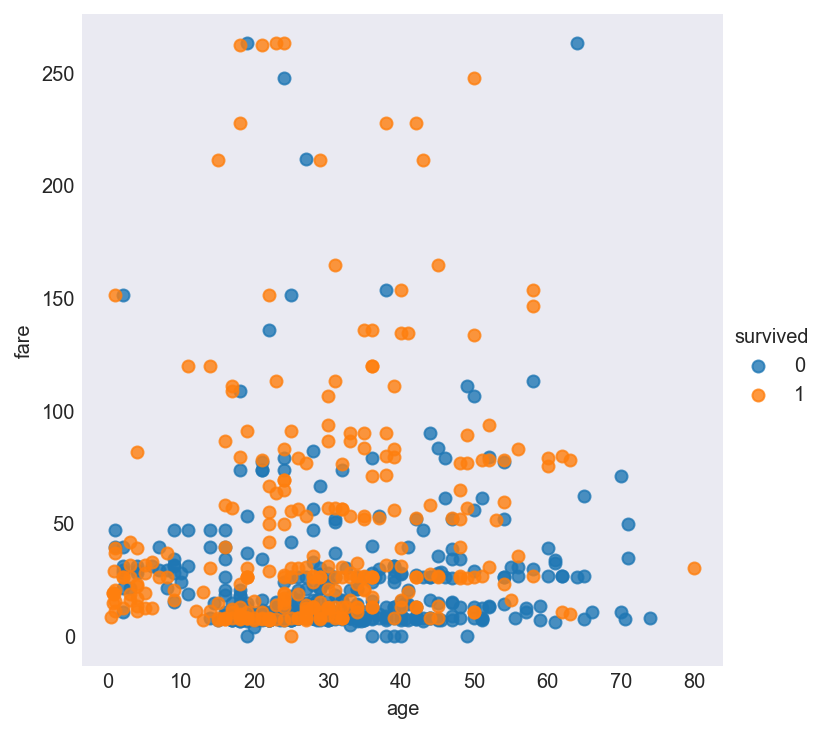

In [6]:
# 잠시 outlier를 없애봅시다
low_f = titanic[titanic['fare'] < 500] #500이하만 가져오기!
sns.lmplot(data=low_f, x ='age', y = 'fare', hue='survived',fit_reg=False)

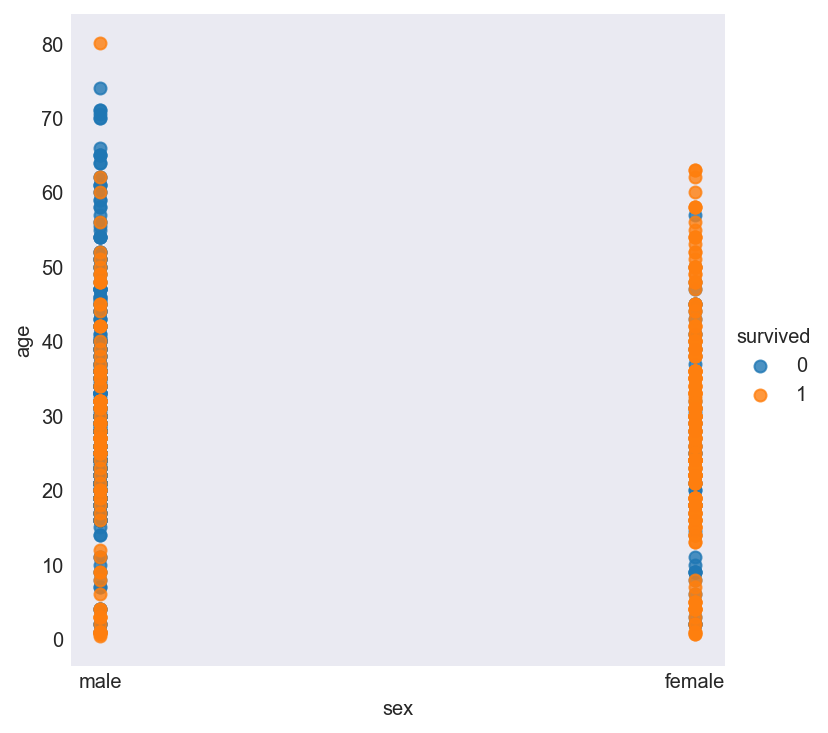

In [7]:
sns.lmplot(data=low_f, x ='sex', y = 'age', hue='survived',fit_reg=False)

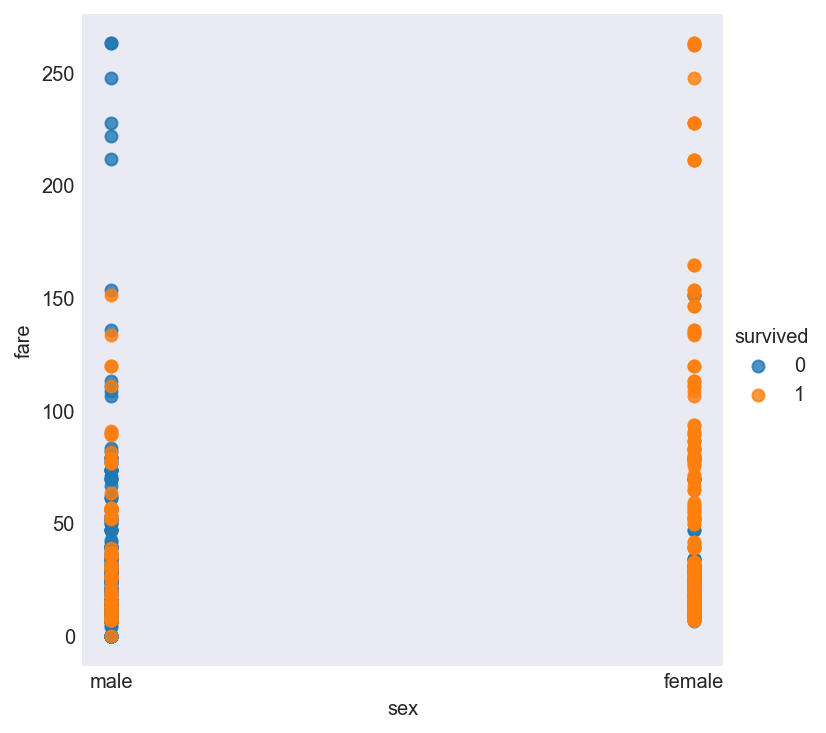

In [8]:
sns.lmplot(data=low_f, x ='sex', y = 'fare', hue='survived',fit_reg=False)

인사이트 2
- 돈을 많이 낼 수록 생존확률이 높음. (위로 올라갈 수록 주황색이 많아짐)
- 어린아이일수록 생존확률이 높음
- 돈과 나이의 관계는 없어보임

    fare와  class 그리고 survived는 어떨까

<AxesSubplot:xlabel='class', ylabel='fare'>

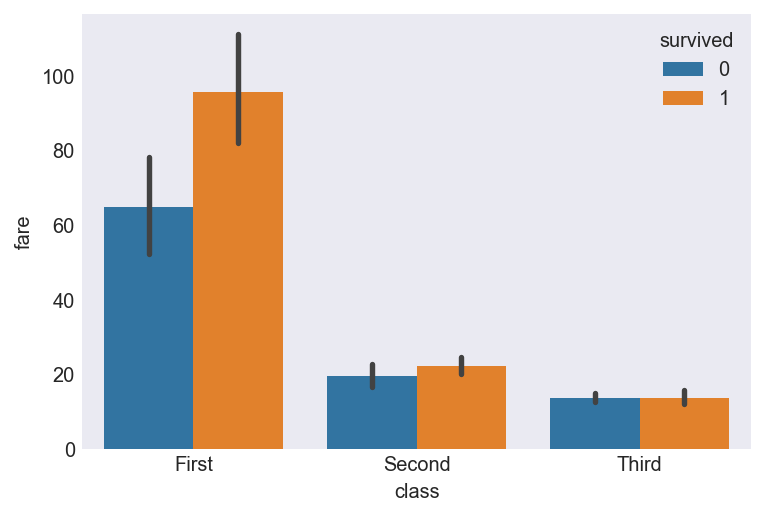

In [9]:
sns.barplot(data=titanic, x ='class', y = 'fare', hue='survived')

역시 돈 많이 낸 first가 생존율이 높다. 


In [10]:
display(titanic.pivot_table(index='class',columns='sex',values='fare',aggfunc='count'))
display(titanic.pivot_table(index='class',columns='sex',values='fare',aggfunc='mean'))
display(titanic.pivot_table(index='class',columns='sex',values='age',aggfunc='mean'))
#first class는 다른 클래스보다 평균 나이가 높다. 비싸서 그랬나보다.

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


<인사이트 3>
- 여성보다 남성이 1등석을 덜 구입했지만
- 여성의 운임이 높다.

    emabared 와 생존율

<AxesSubplot:xlabel='embarked', ylabel='count'>

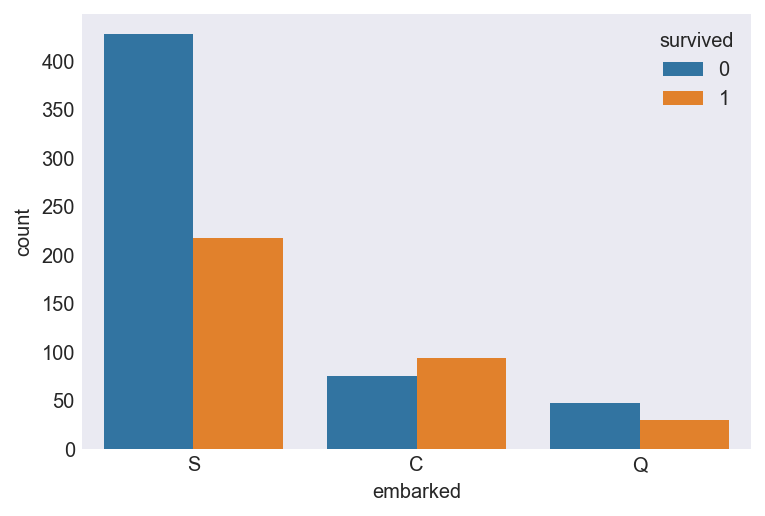

In [11]:
sns.countplot(data=titanic,x='embarked',hue='survived')

S 에서 탔을때 가장 생존율이 높다.
- fare 혹은 class가 다를까

<AxesSubplot:xlabel='embarked', ylabel='fare'>

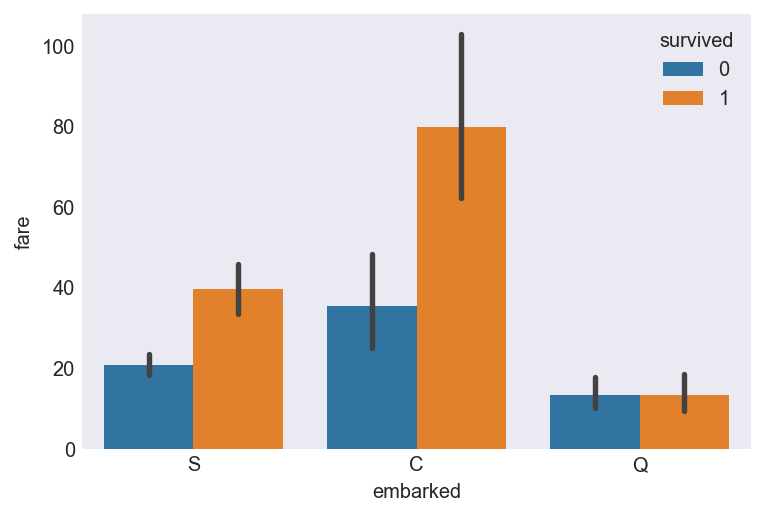

In [12]:
# C에서의 fare값이 가장 높다. 
sns.barplot(data=titanic, x ='embarked', y = 'fare', hue='survived')

In [13]:
#피벗으로 확인해보자
titanic.pivot_table(index='embarked',columns='class',values='fare',aggfunc='count')
#결측값을 제외하고 확인했을떄,
# S에서 가장 많이 탑승을 했다. C와 Q는 상대적으로 많이 적다

class,First,Second,Third
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


인사이트 4
- S에서 가장 많이 탑승을 했기 떄문에, 생존확률과 비용도 상대적으로 낮다.
- 따라서 embarked와 class 의 관계는 적어보인다. # 데이터 크리닝 후 상관계수 0.045702

In [14]:
titanic[['sibsp','survived']].groupby(['sibsp']).mean()
#오 혼자보단 1,2명일때 가장 높고, 그 이상은 더 적음. (서로 챙길 수 있어서 그랬나)
#진짜 슬픈현실 5명이상은 생존확률 0

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [15]:
titanic[['parch','survived']].groupby(['parch']).mean()
#확실히 부모랑 같이 올 경우에 생존확률이 높음
#아마 어린아이의 생존 확률이 높은 이유가 아닐까

,survived
parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


인사이트 5
- 혼자보단 부모와 형제가 1~3명이 있을때 생존확률이 높음
- 부모와 함께일때 생존확률이 높음 --> 아이의 생존확률이 높은 이유

<AxesSubplot:xlabel='class', ylabel='age'>

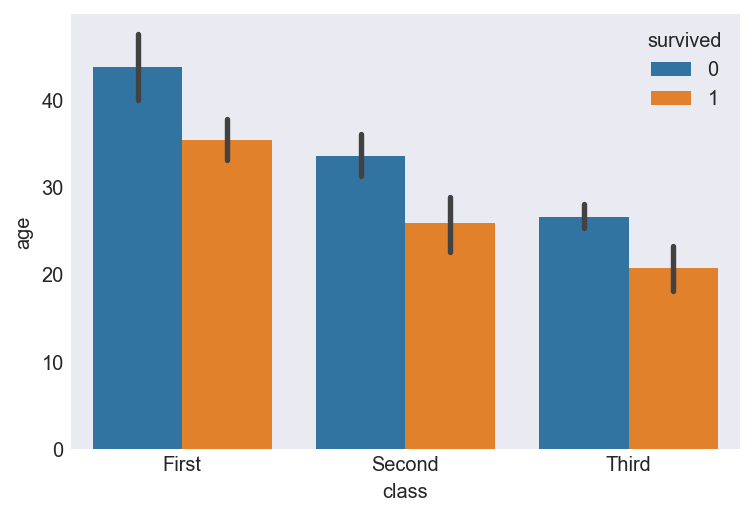

In [16]:
sns.barplot(data=titanic, x ='class', y = 'age', hue='survived')

##### 과제2-1
    Auto-mpg 데이터에서 horsepower열의 고유값을 출력하세요

In [17]:
Auto_mpg = pd.read_csv('../Data/AUto-mpg.csv')
Auto_mpg
#고유값을 출력하세요
hp_uni = Auto_mpg['horsepower'].unique()
hp_uni

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

##### 과제2-2
    horsepower열의 누락 데이터를 삭제한 후 NaN값의 갯수를 출력하세요

In [18]:
#변수생성
d_hp = Auto_mpg['horsepower']
# null값 측정
d_hp.isnull().sum() #결측치는 존재하지 않는다. #대신 '?' 값으로 존재
d_hp = d_hp.replace('?',np.nan)
d_hp.isnull().sum() #nan값으로 변경되면서 결측값이 총 6개.

6

##### 과제2-3
    horsepower의 타입을 실수형으로 변환한 후 자료형을 확인하고 auto_df.pkl로 저장후 다시 불러와 출력하세요

In [19]:
#형태를 변환시키려면 astype()을 사용
d_hp = d_hp.astype('float')
#확인
print(d_hp.dtype)
#pickle로 저장
d_hp.to_pickle('../Data/auto_df.pkl')
#pickle로 다시 불러오기
Load_d_hp = pd.read_pickle('../Data/auto_df.pkl')
Load_d_hp.head()

float64


0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

##### 과제3
    horsepower열의 최대값을 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요

In [20]:
# 정규화 수행 = 스케일링 정규화. MinMaxscaler
# sklearn 모듈을 사용함 (sklearn.preprocessing import MinMaxScaler ; 최대값을 절대값으로 나눔)
scaler = MinMaxScaler()
#초기 변수활용 - str 변환된 변수 사용
Auto_mpg['horsepower'] = d_hp
#정규화 사용
Auto_mpg['horsepower'] = scaler.fit_transform(Auto_mpg[['horsepower']])
#통계요약표 = describe()
Auto_mpg['horsepower'].describe()

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64

In [21]:
def maxabsdiv(x):
    return x / (abs(Auto_mpg.horsepower.max()))

result = Auto_mpg['horsepower'].apply(maxabsdiv)
result.describe

<bound method NDFrame.describe of 0      0.456522
1      0.646739
2      0.565217
3      0.565217
4      0.510870
         ...   
393    0.217391
394    0.032609
395    0.206522
396    0.179348
397    0.195652
Name: horsepower, Length: 398, dtype: float64>

##### 과제4
아래 사항을 처리하세요.

    1. origin 열의 고유값을 출력하세요.
    2. 정수형 데이터를 문자형 데이터를 변환한 후 고유값을 출력하세요 (1:'USA', 2:'EU', 3:'JAPAN')

In [22]:
#고유값 출력 (unique())
print(Auto_mpg['origin'].unique())
#정수형 데이터 변경 및 새변수 설정 
ds_o = Auto_mpg['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}) #series화
#확인
print(ds_o.unique())

[1 3 2]
['USA' 'JAPAN' 'EU']


In [23]:
df_o = Auto_mpg[['origin']].replace({1:'USA', 2:'EU', 3:'JAPAN'}) # df 열변경
#확인
print(df_o.value_counts()) 

origin
USA       249
JAPAN      79
EU         70
dtype: int64


##### 과제5
    origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요

In [25]:
#자료형 확인 (series - dtype 함수)
print(ds_o.dtype)
#범주형으로 변경 및 새 변수생성
ds_o_ca = ds_o.astype('category')
#확인
print(ds_o_ca.dtype)

object
category


In [26]:
#자료형 확인 (DF - dtypes 함수) #열을 기준으로 확인
print(df_o.dtypes,'\n')
#범주형으로 변경 및 새 변수 생성
df_o_ca = df_o.astype('category')
#확인
print(df_o_ca.dtypes,'\n')
#검증
print(df_o_ca.info())

origin    object
dtype: object 

origin    category
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   origin  398 non-null    category
dtypes: category(1)
memory usage: 658.0 bytes
None


##### 과제6
    origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요

In [27]:
#자료형 확인
print(ds_o_ca.dtype,'\n')
#문자열로 변환 및 새 변수 생성
ds_o_st = ds_o_ca.astype('string')
#확인
print(ds_o_st.dtype,'\n')
#출력
print(type(ds_o_st),ds_o_st.head()) #series

category 

string 

<class 'pandas.core.series.Series'> 0    USA
1    USA
2    USA
3    USA
4    USA
Name: origin, dtype: string


In [28]:
#자료형 확인
print(df_o_ca.dtypes)
#문자열로 변환 및 새 변수 생성
df_o_st = df_o_ca.astype('string')
#확인
print(df_o_st.dtypes,'\n')
#검증
print(df_o_st.info(),'\n')
#출력
print(type(df_o_st),df_o_st.head())

origin    category
dtype: object
origin    string
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   origin  398 non-null    string
dtypes: string(1)
memory usage: 3.2 KB
None 

<class 'pandas.core.frame.DataFrame'>   origin
0    USA
1    USA
2    USA
3    USA
4    USA


##### 과제7
    horsepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력]으로 출력하세요
    (np.histogram()함수로 3개의 bin으로 나눔)

In [29]:
#각 구간에 속하는 값의 개수 , 경게값 리스트  = np.histogram(data, 도수분포구간 (bin))
#설명필수..!
count, dhp_divs = np.histogram(Auto_mpg['horsepower'].dropna(),bins=3)
print(count,dhp_divs)
# 3구간 설정했을 때 각 구간의 개수, 경게값.
bin_names = ['저출력','보통출력', '고출력']
Auto_mpg['hp_div_bin'] = pd.cut( x = Auto_mpg['horsepower'],
                               bins = dhp_divs,
                               labels = bin_names,
                               include_lowest = True)
Auto_mpg.head()

#검증
print(Auto_mpg['hp_div_bin'].dtypes)

[257 103  32] [0.         0.33333333 0.66666667 1.        ]
category


In [30]:
Auto_mpg.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,hp_div_bin
0,18.0,8,307.0,0.456522,3504,12.0,70,1,chevrolet chevelle malibu,보통출력
